** Create graphics from search test results.

In [1]:
# as read at https://www.labri.fr/perso/nrougier/teaching/matplotlib/matplotlib.html
##setup
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import clear_output, display, HTML

import seaborn as sns
sns.set_style("whitegrid")

In [337]:
## load data
df = pd.read_csv("log/all_search_result.csv")
#df.columns
df.rename(columns=lambda x: x.strip().lower(), inplace=True)
# show timeout dot on plot
LongTime = 1e6
df.fillna(LongTime, inplace=True)
df.head()

,run,problem,method,expansions,goaltests,newnodes,plan_size,time_elapsed,unnamed: 8
0,0,p1,astar_search_h_ignore_preconditions,41.0,43.0,170.0,6.0,0.083312,1000000.0
1,0,p1,astar_search_h_pg_levelsum,11.0,13.0,50.0,6.0,0.653200,1000000.0
2,0,p1,depth_first_graph_search,12.0,13.0,48.0,12.0,0.008754,1000000.0
3,0,p1,greedy_best_first_graph_search_h_1,7.0,9.0,28.0,6.0,0.005313,1000000.0
4,0,p1,breadth_first_search,43.0,56.0,180.0,6.0,0.033298,1000000.0


In [293]:
# collect possible X axis
problems = df["problem"].unique()
methods = df["method"].unique()
methods

array(['astar_search_h_ignore_preconditions', 'astar_search_h_pg_levelsum',
       'depth_first_graph_search', 'greedy_best_first_graph_search_h_1',
       'breadth_first_search', 'uniform_cost_search'], dtype=object)

In [338]:
# calc mean, std for each method  
d = pd.pivot_table(df, index=['problem'], columns=['method'], values=['time_elapsed','expansions'], aggfunc=[np.mean, np.std])
d.columns.names = ['aggregate', 'measure', 'method']
d.head()

aggregate                                mean                             \
measure                          time_elapsed                              
method    astar_search_h_ignore_preconditions astar_search_h_pg_levelsum   
problem                                                                    
p1                                   0.101987                   0.957091   
p2                                   4.673512                  53.685220   
p3                                  19.810323                 276.744862   
p4                                 416.381336                1613.916353   

aggregate                                                \
measure                                                   
method    breadth_first_search depth_first_graph_search   
problem                                                   
p1                    0.042006                 0.011346   
p2                   18.103318                 3.238126   
p3                  102.770958                 3.287322   
p4              1000000.000000                23.033396   

aggregate                                                         \
measure                                                            
method    greedy_best_first_graph_search_h_1 uniform_cost_search   
problem                                                            
p1                                  0.006788            0.051035   
p2                                  2.543928           17.020085   
p3                                 17.106196           55.566302   
p4                                714.624064      1000000.000000   

aggregate                                                                 \
measure                            expansions                              
method    astar_search_h_ignore_preconditions astar_search_h_pg_levelsum   
problem                                                                    
p1                                       41.0                       11.0   
p2                                     1450.0                       86.0   
p3                                     5040.0                      316.0   
p4                                    62385.0                      697.0   

aggregate                                                       ...          \
measure                                                         ...           
method    breadth_first_search depth_first_graph_search         ...           
problem                                                         ...           
p1                        43.0                     12.0         ...           
p2                      3343.0                    582.0         ...           
p3                     14663.0                    627.0         ...           
p4                   1000000.0                   1509.0         ...           

aggregate                  std                           \
measure           time_elapsed                            
method    breadth_first_search depth_first_graph_search   
problem                                                   
p1                    0.014536                 0.003837   
p2                    3.960136                 0.258875   
p3                    0.693691                 0.010624   
p4                    0.000000                 2.832967   

aggregate                                                         \
measure                                                            
method    greedy_best_first_graph_search_h_1 uniform_cost_search   
problem                                                            
p1                                  0.002323            0.017606   
p2                                  0.082988            4.218312   
p3                                  0.061984            0.151510   
p4                                 16.803994            0.000000   

aggregate                                                                 \
measure                            ex

In [339]:
# reindex rows by [measure, method, problem] and  columns by [aggregate]
dd = d.stack(['measure','method']).unstack('problem').stack()
dd

aggregate                                                           mean  \
measure      method                              problem                   
time_elapsed astar_search_h_ignore_preconditions p1             0.101987   
                                                 p2             4.673512   
                                                 p3            19.810323   
                                                 p4           416.381336   
             astar_search_h_pg_levelsum          p1             0.957091   
                                                 p2            53.685220   
                                                 p3           276.744862   
                                                 p4          1613.916353   
             breadth_first_search                p1             0.042006   
                                                 p2            18.103318   
                                                 p3           102.770958   
                                                 p4       1000000.000000   
             depth_first_graph_search            p1             0.011346   
                                                 p2             3.238126   
                                                 p3             3.287322   
                                                 p4            23.033396   
             greedy_best_first_graph_search_h_1  p1             0.006788   
                                                 p2             2.543928   
                                                 p3            17.106196   
                                                 p4           714.624064   
             uniform_cost_search                 p1             0.051035   
                                                 p2            17.020085   
                                                 p3            55.566302   
                                                 p4       1000000.000000   
expansions   astar_search_h_ignore_preconditions p1            41.000000   
                                                 p2          1450.000000   
                                                 p3          5040.000000   
                                                 p4         62385.000000   
             astar_search_h_pg_levelsum          p1            11.000000   
                                                 p2            86.000000   
                                                 p3           316.000000   
                                                 p4           697.000000   
             breadth_first_search                p1            43.000000   
                                                 p2          3343.000000   
                                                 p3         14663.000000   
                                                 p4       1000000.000000   
             depth_first_graph_search            p1            12.000000   
                                                 p2           582.000000   
                                                 p3           627.000000   
                                                 p4          1509.000000   
             greedy_best_first_graph_search_h_1  p1             7.000000   
                                                 p2           958.000000   
                                                 p3          5578.000000   
                                                 p4        123356.000000   
             uniform_cost_search                 p1            55.000000   
                                                 p2          4839.000000   
                                                 p3         18221.000000   
                                                 p4       1000000.000000   

aggregate                                                       std  
measure      method                              problem             
time_elapsed astar_search_h_ignore_preconditions p1        

In [340]:
# access to data by slices 
bfs = dd.xs('time_elapsed').xs('breadth_first_search')
# pd.DataFrame(d.to_records())
bfs

aggregate,mean,std
problem,,
p1,0.042006,0.014536
p2,18.103318,3.960136
p3,102.770958,0.693691
p4,1000000.000000,0.000000


In [348]:
# x = problems
xs = problems
x = range(len(xs))
# visual grouping
method_group = {'astar_search_h_ignore_preconditions':'-', 'astar_search_h_pg_levelsum':'-',
       'depth_first_graph_search':'--', 'greedy_best_first_graph_search_h_1':'--',
       'breadth_first_search':':', 'uniform_cost_search':':'}

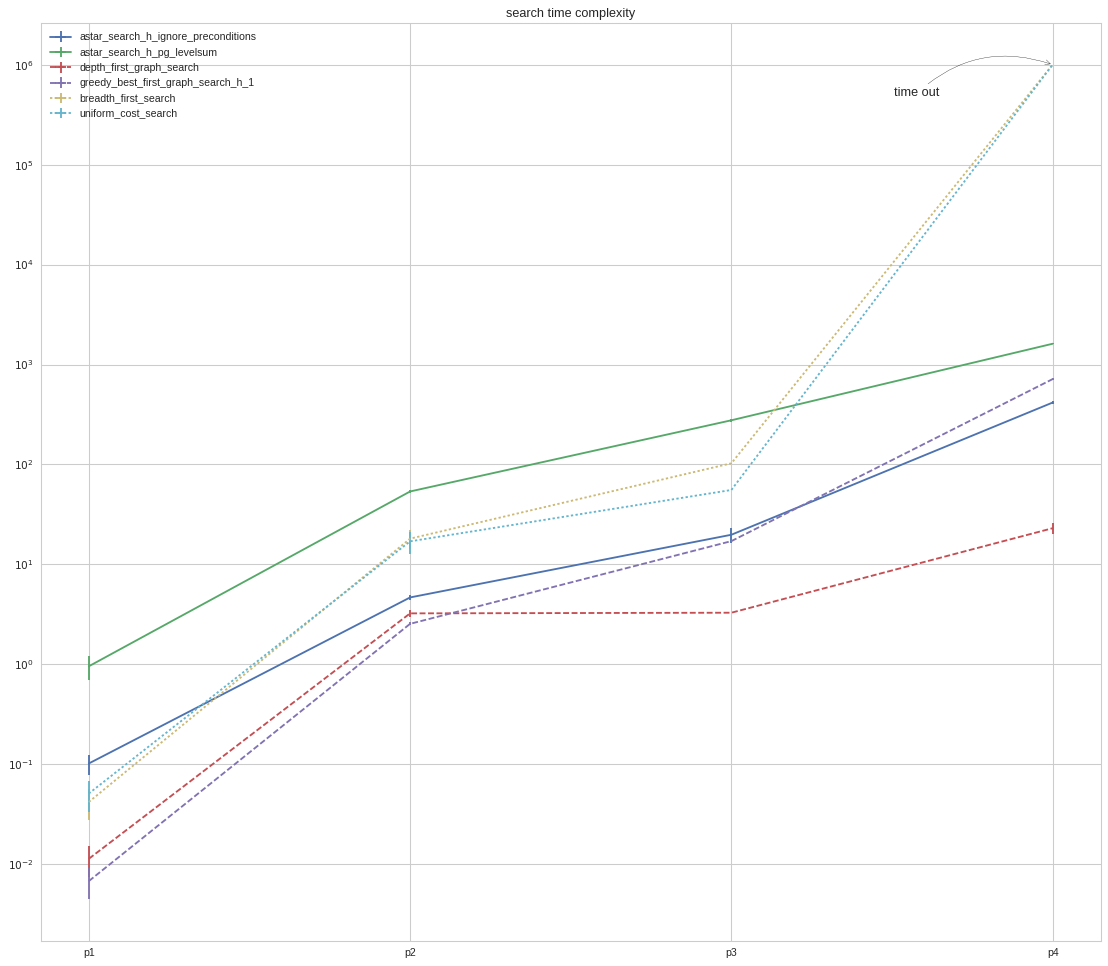

In [349]:
def draw(dots, title):
    def plot_search(method:str):
        y = dots.xs(method)
        plt.errorbar(x, y['mean'], xerr=0, yerr=y['std'], label=method, linestyle=method_group[method]) 

    plt.figure(figsize=(18,16), dpi=76)
    plt.title(title)
    plt.xticks(x, xs)
    for m in methods:
        plot_search(m)
    plt.legend(loc='upper left', frameon=False)
    plt.locator_params(nbins=8) # reduse numer of ticks on axis
    plt.yscale('log')
    # Annotate timeout dot
    plt.annotate('time out', xy=(3,LongTime),
                 xytext=(-150, -30), textcoords='offset points', fontsize=12,
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.3"))
    fig_file = title.replace(' ','_')+'.png'
    # make hardcopy
    plt.savefig(fig_file, dpi=76)
    plt.show()

draw(dd.xs('time_elapsed'), 'search time complexity')

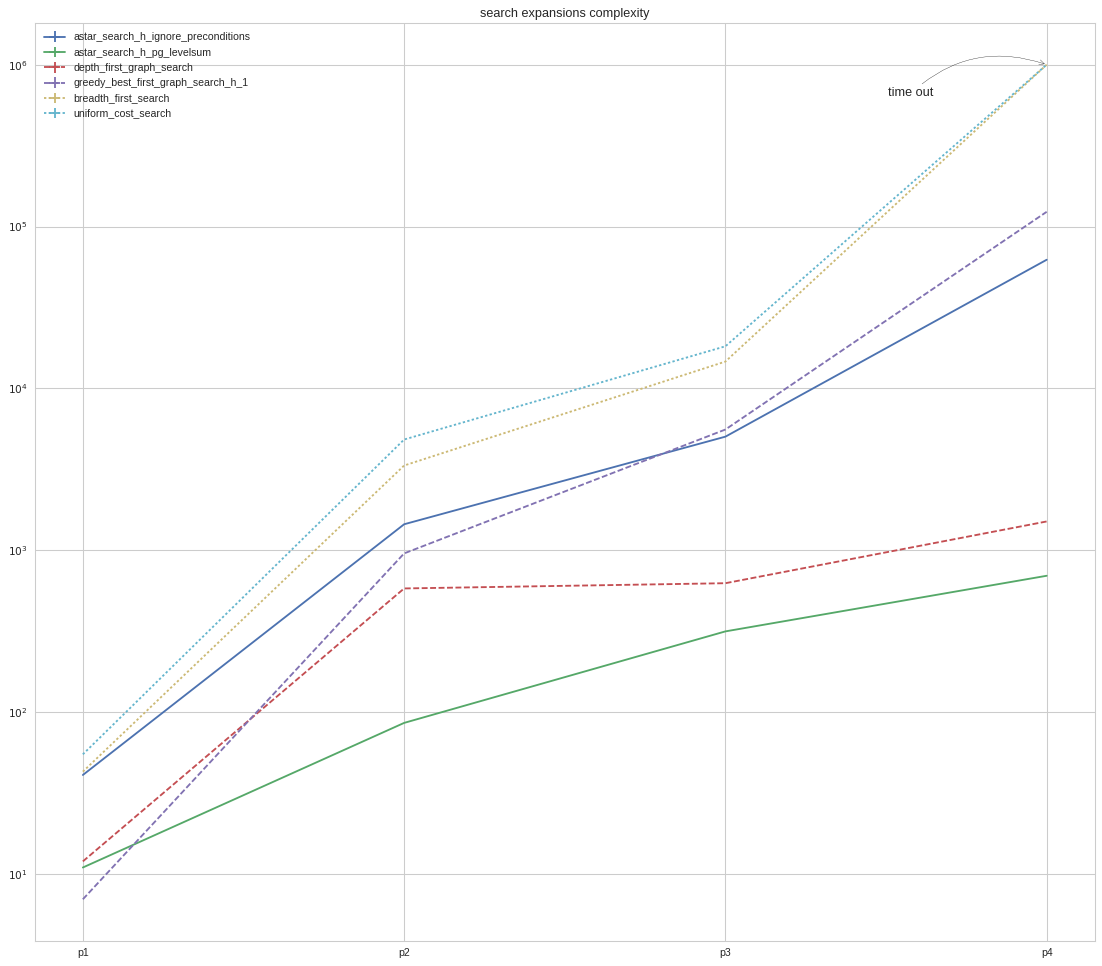

In [350]:
draw(dd.xs('expansions'), 'search expansions complexity')